In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv(r"C:\Users\Paras\Downloads\archive (4)\Algerian_cleaned_dataset.csv")

In [6]:
df.head(5)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [7]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.77269802,
         1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.90344718,
         1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  0.38339978,
        -0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.03419633,
         1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.18383528,
        -0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.99290713,
         1.10431526, -0.98907071]], shape=(182, 11))

In [12]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,1,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,1,1
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,0,1
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,1,0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,1,0
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,1,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,1,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,1,0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,0,1


<Axes: >

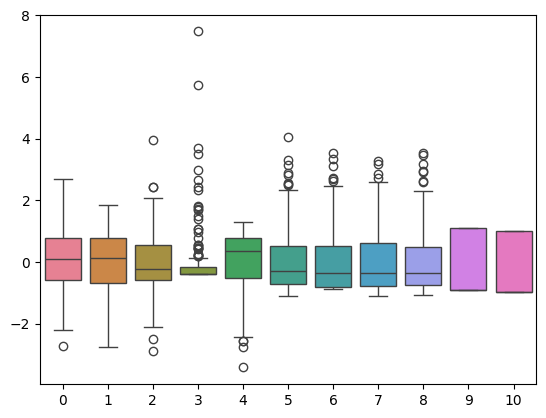

In [13]:
sns.boxplot(data=X_train_scaled)

<Axes: >

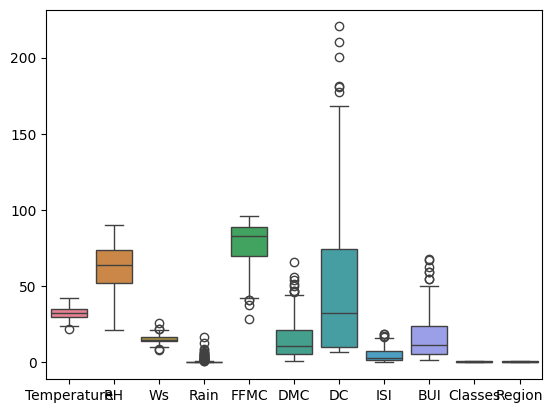

In [14]:
sns.boxplot(X_train)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lreg=LinearRegression()
lreg.fit(X_train_scaled,Y_train)
Y_pred=lreg.predict(X_test_scaled)

In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae=mean_absolute_error(Y_pred,Y_test)

In [18]:
r=r2_score(Y_test,Y_pred)

In [19]:
r

0.98938502949221

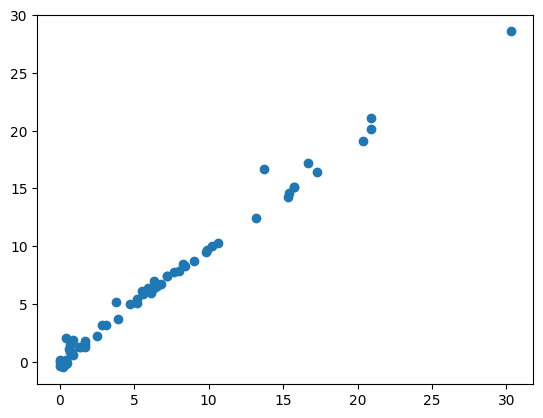

In [20]:
plt.scatter(Y_test,Y_pred)

Lasso Regression

0.9548117077009715


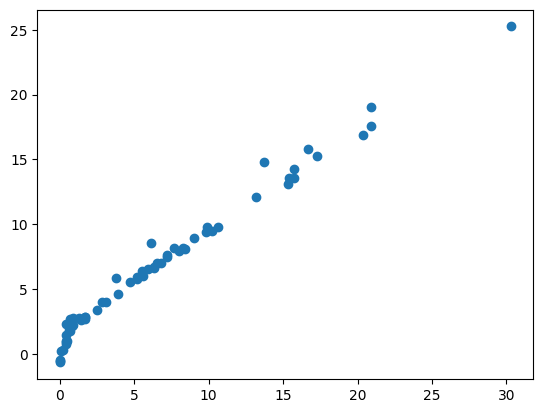

In [21]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,Y_train)
Y_pred=lasso.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae=mean_absolute_error(Y_pred,Y_test)
r=r2_score(Y_test,Y_pred)
print(r)
plt.scatter(Y_test,Y_pred)

Ridge Regression

0.9871729594175267


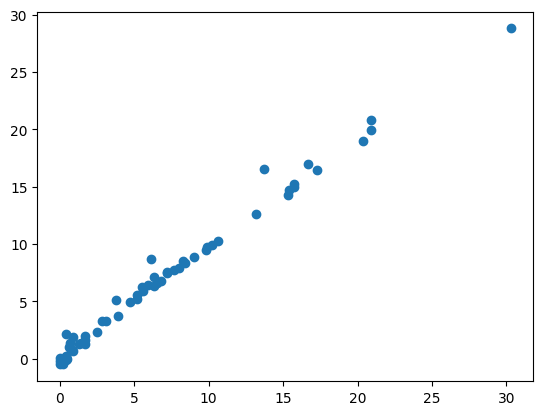

In [22]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,Y_train)
Y_pred=ridge.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae=mean_absolute_error(Y_pred,Y_test)
r=r2_score(Y_test,Y_pred)
print(r)
plt.scatter(Y_test,Y_pred)

Ridge Reg CV

In [23]:
from sklearn.linear_model import RidgeCV
rgcv=RidgeCV(cv=5)
rgcv.fit(X_train_scaled,Y_train)
Y_pred=rgcv.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae=mean_absolute_error(Y_pred,Y_test)
r=r2_score(Y_test,Y_pred)
print(r)

0.9871729594175267


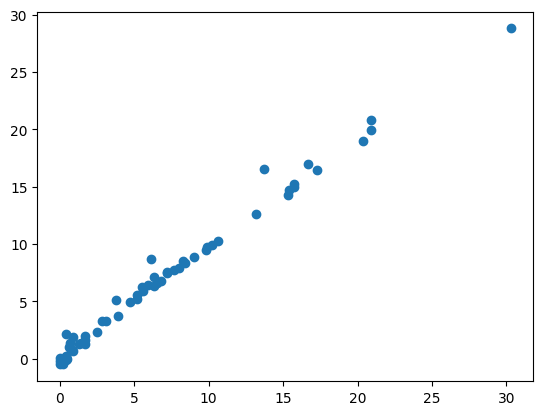

In [24]:
plt.scatter(Y_test,Y_pred)

Lasso Cross Validation

In [25]:
from sklearn.linear_model import LassoCV
lcv=LassoCV()
lcv.fit(X_train_scaled,Y_train)
lcv.predict(X_test_scaled)


array([ 8.22091549e+00,  7.33323327e+00, -2.32891871e-02,  5.43501677e+00,
        6.64326831e+00,  1.63376806e+00,  2.50593854e+00,  7.27830526e+00,
        2.05162403e+00,  3.30992439e+00,  4.24137977e-01,  8.04901731e+00,
        9.45653258e+00,  1.63795428e+01,  1.89034401e+01,  1.60051474e+00,
        1.58526293e+00, -6.48387602e-01,  6.84179848e+00,  3.13163614e+00,
        1.82550224e+00,  2.32676092e-01,  6.27153119e+00,  3.89127197e-03,
        2.09053131e+01,  4.87066500e+00,  5.75813500e+00,  9.90170057e+00,
       -7.14422621e-01,  9.90610607e+00,  6.47676499e+00, -1.60442369e-01,
        1.02447338e+01,  1.49280922e+01,  1.52391538e+00,  1.00078408e+00,
        1.88097075e+00,  5.98101813e+00, -4.06350944e-01, -3.04668332e-01,
        6.81957703e+00,  1.73410689e+00,  8.18580115e+00, -8.43500296e-01,
        1.51544692e+01,  7.91425045e+00,  8.02141387e+00,  9.93478361e-01,
        1.26424482e+01,  9.34269965e-01,  2.82956909e+01,  5.39017133e+00,
        1.71086893e+01,  

In [26]:
lcv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae=mean_absolute_error(Y_pred,Y_test)
r=r2_score(Y_test,Y_pred)
print(r)

0.9871729594175267


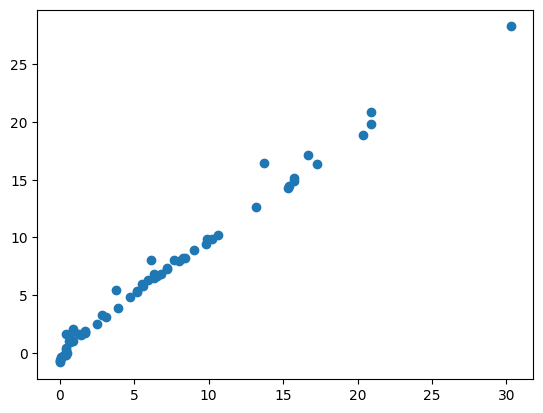

In [28]:
y_pred=lcv.predict(X_test_scaled)
plt.scatter(Y_test,y_pred)

Elasticnet regression

0.900671789556956


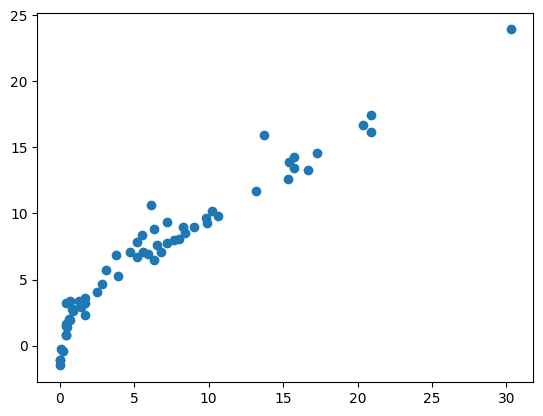

In [29]:
from sklearn.linear_model import ElasticNet
elnet=ElasticNet()
elnet.fit(X_train_scaled,Y_train)
Y_pred=elnet.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae=mean_absolute_error(Y_pred,Y_test)
r=r2_score(Y_test,Y_pred)
print(r)
plt.scatter(Y_test,Y_pred)

In [30]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [31]:
lreg

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

In [33]:
import numpy as np

In [34]:
test_data = np.array([[29, 61, 13, 1.3, 64.4, 4.1, 7.6, 1, 3.9, 1, 0]])

In [35]:
ridge.predict(test_data)

array([-41.85158443])

In [38]:
import pickle
import numpy as np

# Load trained model (LinearRegression)
model = pickle.load(open(r'E:\3rd\udemy\ml\linearReg\project\models\ridge.pkl', 'rb')) 

# Agar scaling use kiya hai, toh scaler bhi load karein
scaler = pickle.load(open(r'E:\3rd\udemy\ml\linearReg\project\models\scaler.pkl', 'rb'))

# Input values
x = np.array([[29, 61, 13, 1.3, 64.4, 4.1, 7.6, 1, 3.9, 1, 0]])

# Agar scaler use hua hai training mein
x_scaled = scaler.transform(x)

# Prediction
y_pred = model.predict(x_scaled)

print("Prediction:", y_pred[0])


Prediction: 0.28997906325811496


c:\Users\Paras\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
